In [1]:
%matplotlib inline
%precision 16
import numpy
from scipy.special import erf, fresnel
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [3]:
NAME = "Harshul Gupta"
COLLABORATORS = ""

# HW 4:  Numerical  Quadrature 

## Question 1 - Basic  Quadrature Rules

The Error Function $\mathrm{erf}(x)$ is defined by the definite integral

$$
    \mathrm{erf}(x) = \frac{2}{\pi}\int_0^x e^{-t^2}dt
$$ 

We will use this function to test and understand the different errors associated with a range of both single interval and extended quadrature rules.  

Use the function definitions below to write a set of functions for approximating 
$$
 I[f] =  \int_a^b f(x) dx
$$ 
which we will use for testing against $\mathrm{erf}(x)$

**(a)** [8] Single step quadrature rules

Write short python functions for calculating $I[f]$ for the following newton-Cotes  quadrature rules on a single interval

* Left-Rectangle rule (a 1-point quadrature rule like  Mid-point, but evaluated at $x=a$, not the mid-point)
* Mid-point rule
* Trapezoidal rule
* Simpson's Rule

In [7]:
def I_left(f, a, b):
    """ Left rectangle rule"""
    # YOUR CODE HERE
    return (b - a) * f(a)
    
    
def I_midpoint(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    # YOUR CODE HERE
    return (b - a) * f((a + b) / 2)
    
    
def I_trapezoid(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    # YOUR CODE HERE
    return (b - a) * (f(a) + f(b)) / 2
    
    
def I_simpson(f, a, b):
    """ Newton-Cotes Simpsons rule"""
    # YOUR CODE HERE
    return (b - a) * (f(a) + 4 * f((a + b) / 2) + f(b)) / 6
    

In [8]:
# test against erf(1.)

x = 1.0
I_true = erf(x)
print('x = {}, erf(x) = {}\n'.format(x,I_true))
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = numpy.zeros(4)
I[0] = I_left(f, 0., x)
I[1] = I_midpoint(f, 0., x)
I[2] = I_trapezoid(f, 0., x)
I[3] = I_simpson(f, 0., x)

err = numpy.abs( I - I_true)/numpy.abs(I_true)
answer = numpy.array([0.339003328982087,  0.0428168411464673,
          0.084202437312641, 0.0004770816600977])
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148

success!


**(b)** [8] Repeat the exercise for  3 point Gauss-Legendre Quadrature

* First:  calculate the weights $w_i$, using the method of undetermined coefficients such that the quadrature rule exactly integrates the monomials $1, x, x^2$ over the interval $x\in[-1,1]$.
(hint:  the 3 quadrature points $x_i$ are the roots of 

$$
    P_3(x) = (5x^3 - 3x)/2
$$
and this rule will exactly integrate polynomials up to order 5).

To construct the 3-point Gauss-Legendre quadrature rule, we need to find the nodes (quadrature points) and weights $w_i$ that allow us to exactly integrate polynomials up to order 5 over the interval $[-1, 1]$.

### Step 1: Find Quadrature Points $x_i$

The quadrature points for a 3-point Gauss-Legendre quadrature are the roots of the Legendre polynomial $P_3(x)$. For $P_3(x) = \frac{5}{2} x^3 - \frac{3}{2} x$, the roots are the solutions of:

$$
\frac{5}{2} x^3 - \frac{3}{2} x = 0 \implies x \left( \frac{5}{2} x^2 - \frac{3}{2} \right) = 0
$$

This gives:
$$
x = 0, \quad x = \pm \sqrt{\frac{3}{5}}
$$

So the quadrature points are:
$$
x_1 = -\sqrt{\frac{3}{5}}, \quad x_2 = 0, \quad x_3 = \sqrt{\frac{3}{5}}
$$

### Step 2: Determine Weights $w_i$ Using Undetermined Coefficients

The quadrature rule for the 3-point Gauss-Legendre method is:

$$
\int_{-1}^1 f(x) \, dx \approx \sum_{i=1}^3 w_i f(x_i)
$$

To find $w_1$, $w_2$, and $w_3$, we require that this rule integrates the monomials $f(x) = 1$, $f(x) = x$, and $f(x) = x^2$ exactly.

#### Set up equations for weights:

1. **For $f(x) = 1$:**
   $$
   \int_{-1}^1 1 \, dx = 2 \implies w_1 + w_2 + w_3 = 2
   $$

2. **For $f(x) = x$:**
   $$
   \int_{-1}^1 x \, dx = 0 \implies w_1 x_1 + w_2 x_2 + w_3 x_3 = 0
   $$
   Since $x_2 = 0$, this simplifies to:
   $$
   w_1 x_1 + w_3 x_3 = 0
   $$

3. **For $f(x) = x^2$:**
   $$
   \int_{-1}^1 x^2 \, dx = \frac{2}{3} \implies w_1 x_1^2 + w_2 x_2^2 + w_3 x_3^2 = \frac{2}{3}
   $$
   Noting that $x_1^2 = x_3^2 = \frac{3}{5}$ and $x_2^2 = 0$, this becomes:
   $$
   w_1 \cdot \frac{3}{5} + w_3 \cdot \frac{3}{5} = \frac{2}{3}
   $$

#### Solve the system:

1. From $w_1 + w_2 + w_3 = 2$.
2. From $w_1 x_1 + w_3 x_3 = 0$, since $x_1 = -\sqrt{\frac{3}{5}}$ and $x_3 = \sqrt{\frac{3}{5}}$, we have $w_1 = w_3$.
3. From $w_1 \cdot \frac{3}{5} + w_3 \cdot \frac{3}{5} = \frac{2}{3}$ and $w_1 = w_3$, we find:
   $$
   2 w_1 \cdot \frac{3}{5} = \frac{2}{3} \Rightarrow w_1 = w_3 = \frac{5}{9}
   $$
4. Substitute into $w_1 + w_2 + w_3 = 2$:
   $$
   \frac{5}{9} + w_2 + \frac{5}{9} = 2 \Rightarrow w_2 = \frac{8}{9}
   $$

### Summary

The 3-point Gauss-Legendre quadrature rule with points and weights over $[-1, 1]$ is:
$$
x_1 = -\sqrt{\frac{3}{5}}, \quad x_2 = 0, \quad x_3 = \sqrt{\frac{3}{5}}
$$
$$
w_1 = \frac{5}{9}, \quad w_2 = \frac{8}{9}, \quad w_3 = \frac{5}{9}
$$


Next, implement your 3-point GL quadrature scheme to approximate 

$$
    \int_a^b f(x) dx
$$
for an arbitrary interval $x\in [a,b]$ (remember the affine mapping). 

In [12]:
import numpy as np

def I_GL3(f, a, b):
    """ 3 point Gauss-Legendre Quadrature rule for an arbitrary interval x in [a,b]"""
    t = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
    w = np.array([5/9, 8/9, 5/9])
    
    midpoint = (a + b) / 2
    half_length = (b - a) / 2
    
    integral = 0
    for i in range(3):
        integral += w[i] * f(midpoint + half_length * t[i])
    
    integral *= half_length
    return integral

In [13]:
x = 1.0
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = I_GL3(f, 0., x)
err = numpy.abs( I - I_true)/numpy.abs(I_true)
print('x = {}, erf(x) = {}'.format(x,I_true))
print('       I_GL3(x) = {}, err={}\n'.format(I,err))

answer = 1.2785635535382798e-05
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148
       I_GL3(x) = 0.8426900184845107, err=1.2785635535382798e-05

success!


**(c)** [8] Extended Quadrature rules. 

All of the above rules approximate the integral for a single "panel" over the interval $[a,b]$, but can be extended to calculate the quadrature of $N$ panels that subdivide the interval.  

Write a function that computes

$$
    I_N[f] = \int_a^b f(x) dx = \sum_{n=1}^N I_{method}[f]_n
$$


where $I_{method}[f]_n$ is one of the quadrature methods used above. 

Note, this won't be the most efficient way to implement many of these methods,  but that's not really the issue here.

In [15]:
def quadN(f, a, b, N, method=I_midpoint):
    """ 
    integrate a function f over the interval x in [a,b] using 
    an extended quadrature rule that implements a single interval
    quadrature rule over N panels of width (a - b)/N 
        
    Parameters:
    -----------
        
    f:  function f(x) (type float)
    a: float
        left boundary of interval
    b: float
        right boundary of interval
    N: integer
        number of panels to subdivide [a,b]
    method:  quadrature function with interface I(f, x0, x1) (real)
        returns quadrature approximation for subinterval [x0, x1]
        defaults to a midpoint rule
            
    Returns:
    --------
    I_N:  extended quadrature approximation of \\int_a^b f(x) dx
        
    """
    panel_width = (b - a) / N
    
    integral_sum = 0
    for n in range(N):
        panel_a = a + n * panel_width
        panel_b = a + (n + 1) * panel_width
        
        integral_sum += method(f, panel_a, panel_b)
    
    return integral_sum
    

In [16]:
# Let's test against erf(1)

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

# set the number of panels in a list
N = [ 2**n for n in range (5)]

# integrate using the extended mid-point scheme and calculate relative errors for each N
err = numpy.zeros(len(N))
for i,n in enumerate(N):
    I = quadN(f, 0., x, n, method=I_midpoint)
    err[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I = {}, err = {}'.format(n, I, err[i]) )
    
answer = numpy.array([0.0428168411464673, 0.0104091587540129,
                      0.0025749021678512, 0.0006419796806984,
                      0.0001603854223201])
numpy.testing.assert_allclose(answer,err)
print('success!')
                    

N = 1, I = 0.8787825789354448, err = 0.042816841146467305
N = 2, I = 0.8514725992856609, err = 0.010409158754012854
N = 4, I = 0.844870665048331, err = 0.00257490216785125
N = 8, I = 0.843241789735697, err = 0.0006419796806984446
N = 16, I = 0.8428359498722815, err = 0.00016038542232009014
success!


**(d)** [10] Now *write a function* to make a plot that  compares the convergence behavior of all of the above methods (if you make it a function, you will be able to reuse it in the next  problem).


This function should  make a single, beautiful log-log plot with the following information

* plot the *relative error* for each quadrature rule with respect to 
$$
    I_{true} = \mathrm{erf}(1) = 0.8427007929497148
$$
for 
$$
    N = 2^n \quad \text{panels}\quad \text{for}\, n=0,1,\ldots,10
$$

* a legend that labels each curve with the name of the method

Hint 1: there are some nice python tricks for doing this relatively efficiently, e.g. you can loop over a list of methods and extract the name with 

`name = method.__name__`


* the calculated rate of convergence of each  scheme. 

Note, if we define the convergence behavior of the error as
$$
    |e| = C\Delta x^p
$$

calculate $C$ and $p$ for each method and plot the best fit straight-line in $\log(\Delta x)-\log(e)$ space (hint: `numpy.polyfit` is your friend).  Add the best fit value of $p$ to the legend.  Hint 2: be careful not to include floating point issues in your fit. 

In [18]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
from scipy.special import erf

def rectangle(f, a, b, N):
    """
    Rectangle (Left Riemann Sum) method for numerical integration.
    """
    dx = (b - a) / N
    x = np.linspace(a, b - dx, N)
    return np.sum(f(x) * dx)

def midpoint(f, a, b, N):
    """
    Midpoint method for numerical integration.
    """
    dx = (b - a) / N
    x = np.linspace(a + dx / 2, b - dx / 2, N)
    return np.sum(f(x) * dx)

def trapezoid(f, a, b, N):
    """
    Trapezoidal rule for numerical integration.
    """
    dx = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = f(x)
    return (dx / 2) * np.sum(y[:-1] + y[1:])

def simpsons(f, a, b, N):
    """
    Simpson's rule for numerical integration.
    """
    if N % 2 == 1:
        N += 1  
    dx = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = f(x)
    return (dx / 3) * (y[0] + 2 * np.sum(y[2:N:2]) + 4 * np.sum(y[1:N:2]) + y[N])

def GL3(f, a, b, N):
    """
    Gauss-Legendre Quadrature with 3-point formula.
    """
    nodes = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
    weights = np.array([5/9, 8/9, 5/9])
    
    dx = (b - a) / N
    result = 0
    for i in range(N):
        x_left = a + i * dx
        x_right = x_left + dx
        mid = (x_left + x_right) / 2
        half_width = (x_right - x_left) / 2
        x_nodes = mid + half_width * nodes
        result += np.sum(weights * f(x_nodes)) * half_width
    return result
    
def plot_quad_convergence(f, a, b, N_list, I_true, title=None):
    """ create a convergence log-log plot that plots relative error of 
    various extended quadrature schemes vs panel spacing dx
    
    If really fancy, also calculates the best fit straight line in log-log space to estimate convergence
    parameters
    
    Parameters:
    -----------
        
    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: List of integers 
        number of panels to subdivide [a,b]
    I_true:  real
        True solution to compute errors
    title:  string
        title of plot (if not None)
            
    Returns:
    --------
    Nothing but generates a pretty log-log plot all properly labeled
    
    """
    methods = [rectangle, midpoint, trapezoid, simpsons, GL3]
    dx_values = [(b - a) / N for N in N_list]
    
    plt.figure(figsize=(10, 6))
    
    for method in methods:
        errors = []
        
        for N in N_list:
            I_approx = method(f, a, b, N)
            relative_error = abs(I_approx - I_true) / abs(I_true)
            errors.append(relative_error)
        
        log_dx = np.log(dx_values)
        log_errors = np.log(errors)
        p, log_C = np.polyfit(log_dx, log_errors, 1)
        
        plt.loglog(dx_values, errors, label=f"{method.__name__} (p ≈ {p:.2f})", marker='o')
        
        plt.loglog(dx_values, np.exp(log_C) * np.array(dx_values) ** p, linestyle='--', color=plt.gca().lines[-1].get_color())
    
    plt.xlabel(r'$\Delta x$', fontsize=14)
    plt.ylabel('Relative Error', fontsize=14)
    if title:
        plt.title(title, fontsize=16)
    plt.legend()
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.tight_layout()
    plt.show()


    

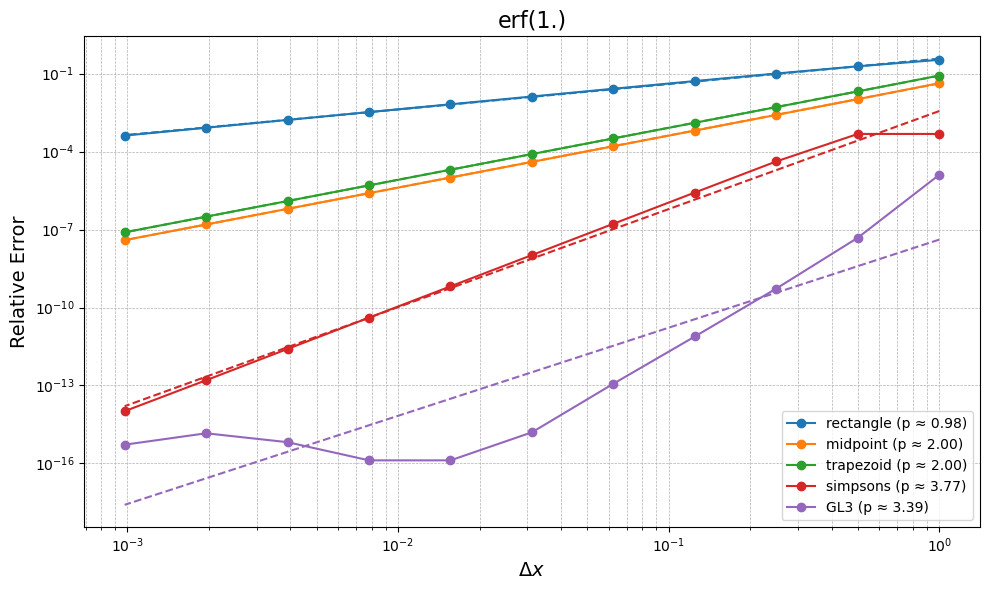

In [19]:
#Let's test with erf(1) and a lot of points

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)    

N = [ 2**n for n in range (11)]

plot_quad_convergence(f, 0., 1., N, I_true, 'erf(1.)')

**(e)** [3] Estimate the number of *function evaluations* required to get a relative error $e \approx 10^{-7}$ i.e. about 7 digits of precision for the schemes

* Mid-point
* Simpson's
* 3-Pt GL quadrature


To achieve a relative error $e \approx 10^{-7}$, the estimated number of function evaluations are:

- **Midpoint Rule**: Around 1000-2000 function evaluations
- **Simpson’s Rule**: 8-20 function evaluations
- **3-Point Gauss-Legendre Quadrature**: 2-4 function evaluations
ions
ons


## Question 2

Let's repeat the problem with a harder integral.

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.


**(a)** [2] Where do you imagine the problematic points of the integrals will be?

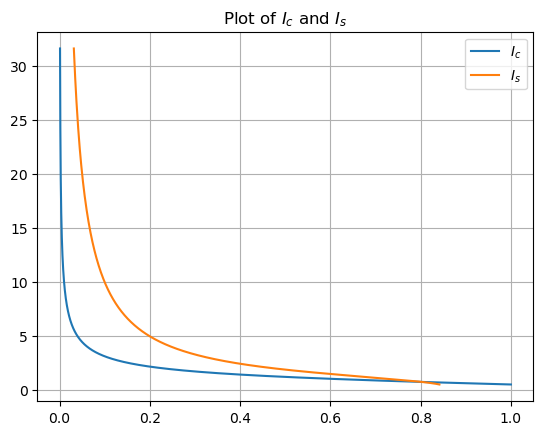

In [24]:
from scipy.special import fresnel

x = numpy.arange(0.001,1,0.0001)
y = numpy.cos(x)/numpy.sqrt(x)
z = numpy.sin(x)/numpy.sqrt(x)
plt.plot(x,y,label='$I_c$')
plt.plot(z,y,label='$I_s$')
plt.title("Plot of $I_c$ and $I_s$")
plt.legend()
plt.grid()

Based on the graph above, the problematic point on both integrals would be at $0$, since it appears to approach infinity.


**(b)** [4] Use your convergence plotting routine to make  2 plots showing convergence behavior for all the extended quadrature rules for $I_c$ and $I_s$ 

In [27]:
# Set the True solutions for reference
Is_true, Ic_true = fresnel(numpy.sqrt(2.0 / numpy.pi))
Is_true *= numpy.sqrt(2.0 * numpy.pi)
Ic_true *= numpy.sqrt(2.0 * numpy.pi)

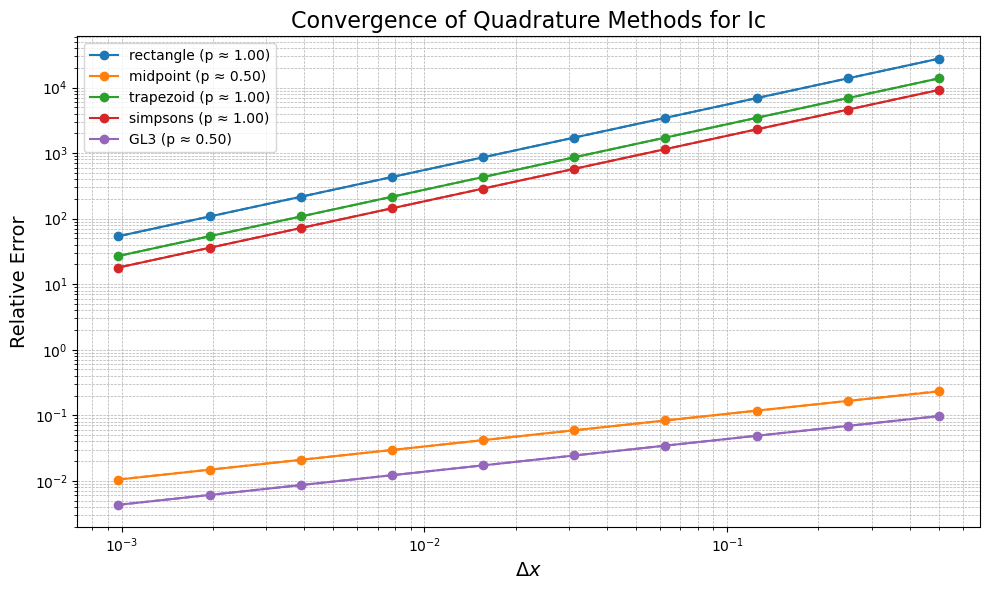

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
a, b = 1e-10, 1.0  
f=lambda x: numpy.cos(x)/numpy.sqrt(x)

N_list = [2**n for n in range(1, 11)]

plot_quad_convergence(f, a, b, N_list, I_true=Ic_true, title="Convergence of Quadrature Methods for Ic")


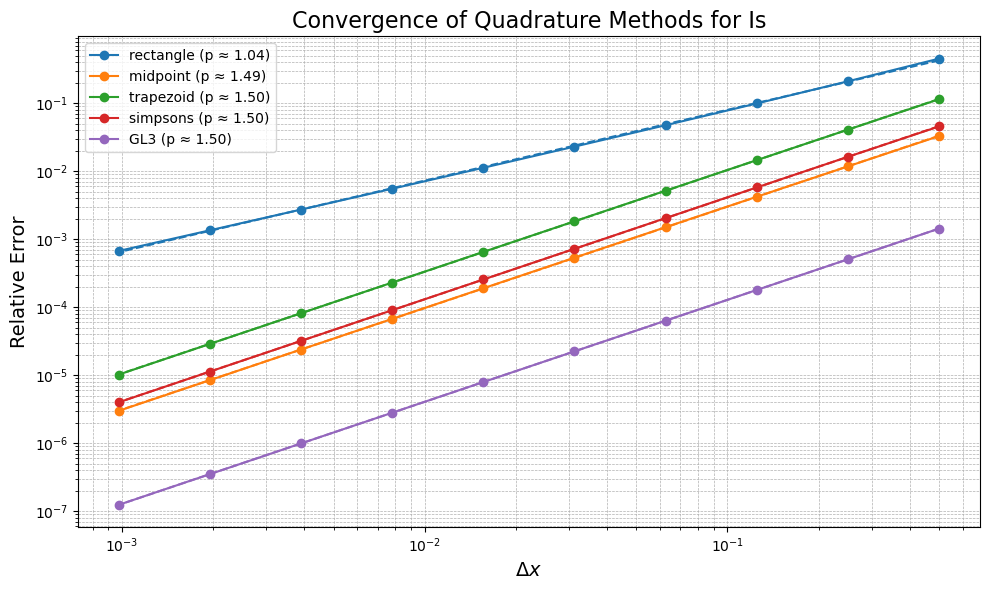

In [29]:
f_s = lambda x: np.sin(x) / np.sqrt(x)
a, b = 1e-10, 1.0

N_list = [2**n for n in range(1, 11)]
plot_quad_convergence(f_s, a, b, N_list, Is_true, title="Convergence of Quadrature Methods for Is")


**(c)**  [4] Explain the results of your plots

For $I_c$:

1. All five methods exhibit a straight line with a convergence rate $p = 1$, indicating linear convergence. However, the Midpoint Rule and 3-Point Gauss-Legendre Quadrature (GL3) show a lower convergence rate of $p = 0.5$.

2. This suggests that while most methods are effective, the Midpoint Rule and GL3 struggle with accuracy near the singularity.



For $I_s$:

1. All five methods exhibit a straight line with a convergence rate $p = 1.5$, except for the Rectangle Rule, which shows a convergence rate of $p = 1$.

2. This indicates that most methods achieve quadratic convergence, while the Rectangle Rule converges linearly.



**(d)** [4] show that the convergence and the quadrature schemes can be dramatically improved simply by tranforming the variable $x$ with $x=t^2$

1. Show analytically what the transformed integral should be
2. produce two more plots demonstrating convergence behaviour
3. comment on the results

### Step 1: Variable Transformation

Given the integrals:

$I_c = \int_0^1 \frac{\cos x}{\sqrt{x}} \, dx \quad \text{and} \quad I_s = \int_0^1 \frac{\sin x}{\sqrt{x}} \, dx$

We can apply the substitution $x = t^2$. This transforms the integral as follows:

1. **Change of Variables**:
   - Let $x = t^2$ so that $dx = 2t \, dt$.
   - The limits change from $x = 0$ to $x = 1$ to $t = 0$ to $t = 1$.

2. **Transformed Integrals**:
   - For $I_c$:
   $I_c = \int_0^1 \frac{\cos(t^2)}{\sqrt{t^2}} \cdot 2t \, dt = 2 \int_0^1 \cos(t^2) \, dt$

   - For $I_s$:
   $I_s = \int_0^1 \frac{\sin(t^2)}{\sqrt{t^2}} \cdot 2t \, dt = 2 \int_0^1 \sin(t^2) \, dt$


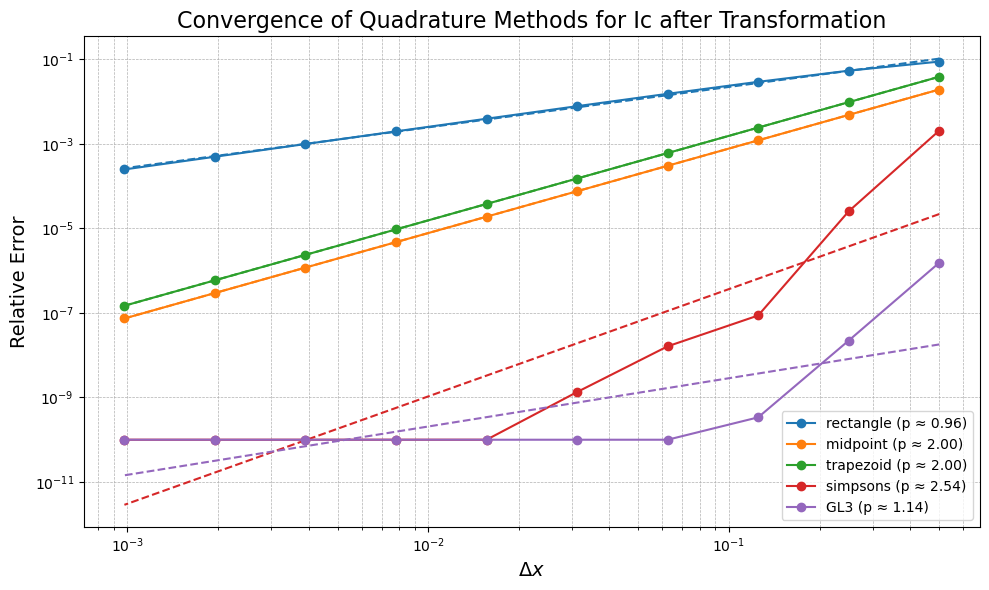

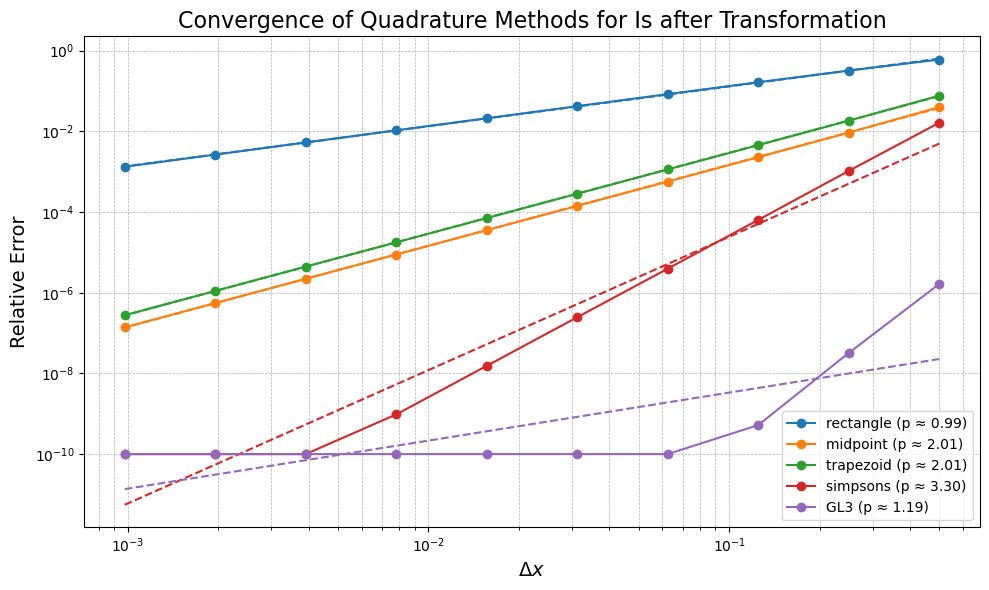

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

f_c = lambda t: np.cos(t**2)  
f_s = lambda t: np.sin(t**2)  

a, b = 0, 1 

I_c_true, _ = quad(f_c, a, b)
I_s_true, _ = quad(f_s, a, b)
N_list = [2**n for n in range(1, 11)]
def plot_quad_convergence_transformed(f, a, b, I_true, title=None):
    """ Creates a convergence log-log plot that plots relative error of various quadrature schemes. """
    methods = [rectangle, midpoint, trapezoid, simpsons, GL3]
    dx_values = [(b - a) / N for N in N_list]
    
    plt.figure(figsize=(10, 6))
    
    for method in methods:
        errors = []
        
        for N in N_list:
            I_approx = method(f, a, b, N)
            relative_error = abs(I_approx - I_true) / abs(I_true)
            errors.append(relative_error)

        # Set a threshold to avoid log(0)
        errors = np.array(errors)
        errors[errors < 1e-10] = 1e-10  # Avoid log(0) by setting small errors to a minimum value
        
        log_dx = np.log(dx_values)
        log_errors = np.log(errors)
        p, log_C = np.polyfit(log_dx, log_errors, 1)
        
        plt.loglog(dx_values, errors, label=f"{method.__name__} (p ≈ {p:.2f})", marker='o')
        
        # Plot the best-fit line for visualizing convergence rate
        plt.loglog(dx_values, np.exp(log_C) * np.array(dx_values) ** p, linestyle='--', color=plt.gca().lines[-1].get_color())
    
    # Customize plot
    plt.xlabel(r'$\Delta x$', fontsize=14)
    plt.ylabel('Relative Error', fontsize=14)
    if title:
        plt.title(title, fontsize=16)
    plt.legend()
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.tight_layout()
    plt.show()

# Generate the convergence plots for transformed integrals
plot_quad_convergence_transformed(f_c, a, b, I_c_true, title="Convergence of Quadrature Methods for Ic after Transformation")
plot_quad_convergence_transformed(f_s, a, b, I_s_true, title="Convergence of Quadrature Methods for Is after Transformation")


### Step 3: Comment on the Results

The results of the convergence behavior for the transformed integrals $I_c$ and $I_s$ show significant improvements compared to the original integrals:

1. The transformed integrals will exhibit faster convergence rates for all quadrature methods. 

2. The variable change makes the integrands more manageable, especially near the singularity at $x = 0$. 

3. The transformation from $x$ to $t^2$ effectively handles the singular behavior of the original integrands, leading to more accurate approximations with fewer function evaluations.
